# Load dataset & preprocessing

In [1]:
import pandas as pd
import numpy as np

root_dir = "datasets/infuluenza/"
data_path = root_dir + "Influenza.csv"
exp_dir = "datasets/infuluenza/vecLSTMx/"

df = pd.read_csv(data_path)

/home/is/daiki-ko/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/is/daiki-ko/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df[["Flucases", "Tempave", "Rh"]].describe()

,Flucases,Tempave,Rh
count,48880.000000,48880.000000,48880.000000
mean,523.660495,15.686540,69.011498
std,1421.128437,8.489355,8.936186
min,0.000000,-7.485714,28.000000
25%,1.000000,8.257143,63.285714
50%,21.000000,16.242857,69.571429
75%,338.000000,22.914286,75.342857
max,26635.000000,32.071429,97.285714


In [3]:
df_tokyo = df[df['regnames'].isin(["Tokyo"])]

df_tokyo.head()

,Alltime,Time,region,regnames,Longitude,Latitude,Altitude,Year,Month,Week,Flucases,Holiday,Tempave,Tempmin,Tempmax,Rh
12480,12481,1,13,Tokyo,35.689185,139.691648,34.9,2000,1,1,818,2,9.528571,6.371429,13.385714,50.571429
12481,12482,2,13,Tokyo,35.689185,139.691648,34.9,2000,1,2,1167,3,8.642857,5.457143,12.000000,61.142857
12482,12483,3,13,Tokyo,35.689185,139.691648,34.9,2000,1,3,2562,2,6.828571,4.171429,9.500000,56.000000
12483,12484,4,13,Tokyo,35.689185,139.691648,34.9,2000,1,4,3781,2,5.342857,1.542857,9.400000,42.000000
12484,12485,5,13,Tokyo,35.689185,139.691648,34.9,2000,1,5,3903,2,7.214286,3.171429,11.585714,38.714286


In [4]:
import matplotlib.pyplot as plt #描画用ライブラリ

In [5]:
train_n = int(len(df_tokyo["Flucases"])*0.75)
test_n = int(len(df_tokyo["Flucases"])*0.25)
train_n, test_n

(780, 260)

In [6]:
train_steps = np.arange(train_n)
test_steps = np.arange(train_n,train_n + test_n)

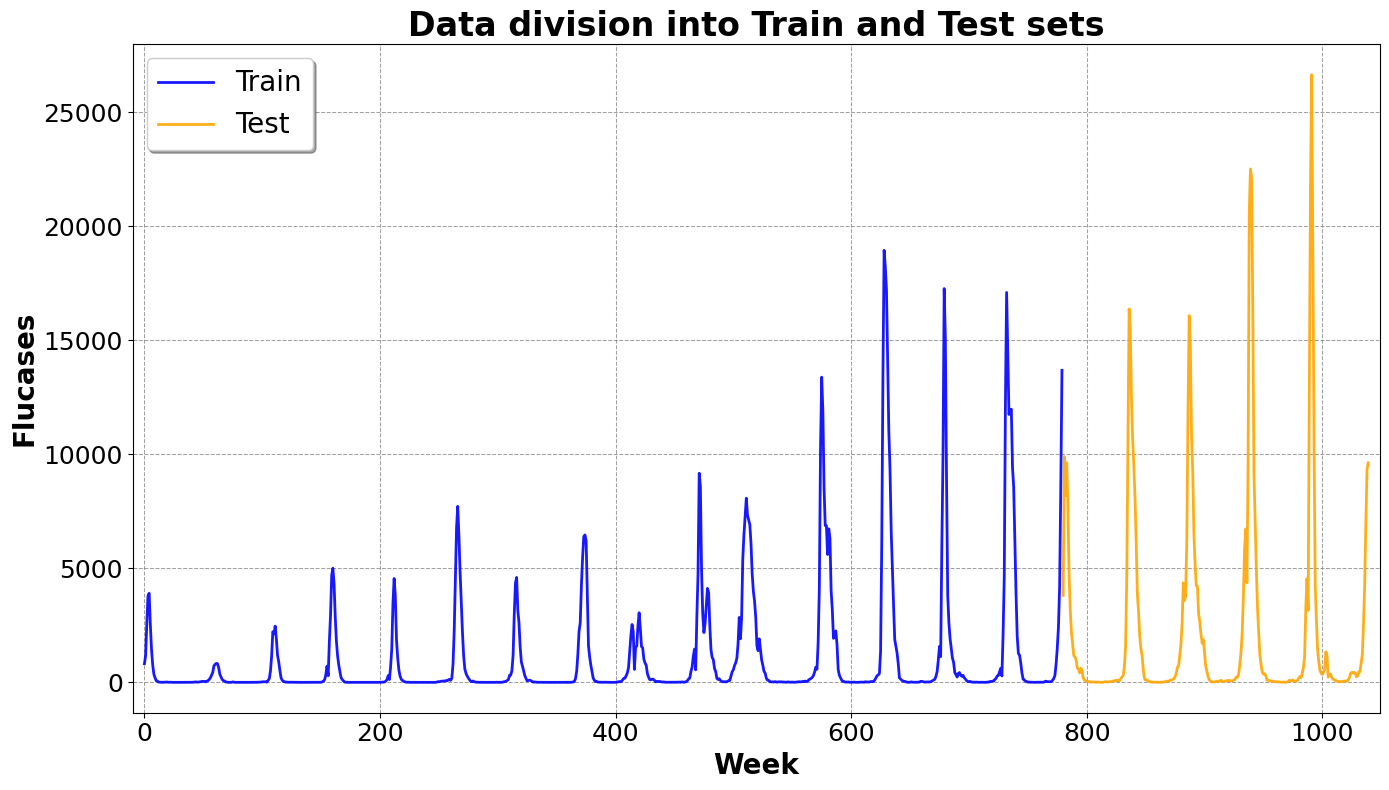

In [7]:
plt.figure(figsize=(14, 8))
plt.style.use('default')  # スタイリッシュな背景に変更

# 実際のデータと予測データをプロット
plt.plot(train_steps, df_tokyo["Flucases"][0:train_n],label="Train", linewidth=2, color='blue', alpha=0.9)
plt.plot(test_steps, df_tokyo["Flucases"][train_n:train_n+test_n],label="Test", linestyle='-', linewidth=2, color='orange', alpha=0.9)


# 軸ラベルとタイトルを追加
plt.xlabel("Week", fontsize=20, fontweight='bold')
plt.ylabel("Flucases", fontsize=20, fontweight='bold')
plt.title("Data division into Train and Test sets", fontsize=24, fontweight='bold')

# グリッドの調整
plt.grid(color='gray', linestyle='--', linewidth=0.75, alpha=0.75)

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.xlim(left=min(train_steps) - 10, right = max(test_steps) + 10)
# 凡例の調整
plt.legend(fontsize=20, loc='upper left', frameon=True, shadow=True)
    
# 仕上げ
plt.tight_layout()

plt.show()

In [8]:
columns = ["Flucases","Tempave", "Rh", "Holiday"]

all_data = df_tokyo[columns]

In [9]:
train_df = all_data[columns][0:train_n]
test_df = all_data[columns][train_n:train_n+test_n]

In [10]:
train_df.head()

,Flucases,Tempave,Rh,Holiday
12480,818,9.528571,50.571429,2
12481,1167,8.642857,61.142857,3
12482,2562,6.828571,56.000000,2
12483,3781,5.342857,42.000000,2
12484,3903,7.214286,38.714286,2


In [11]:
test_df.head()

,Flucases,Tempave,Rh,Holiday
13260,3809,5.357143,47.142857,3
13261,9892,6.285714,38.285714,2
13262,8198,5.628571,53.857143,3
13263,9625,6.771429,63.714286,2
13264,7844,4.228571,49.000000,2


trainとtestのdfを作る

In [12]:
train_ts_df = train_df["Flucases"]
train_ys_df = train_df[["Tempave", "Rh"]]
train_xs_df = train_df["Holiday"]

test_ts_df = test_df["Flucases"]
test_ys_df = test_df[["Tempave", "Rh"]]
test_xs_df = test_df["Holiday"]

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_scaler = StandardScaler()

std_scaler.fit(train_ys_df)
train_scaled_ys = std_scaler.transform(train_ys_df)

In [14]:
import joblib

joblib.dump(std_scaler, exp_dir + 'std_scaler.joblib')

['datasets/infuluenza/vecLSTMx/std_scaler.joblib']

In [15]:
#元のデータの最大値と最小値を指定
dat_min = 0
dat_max = 3e5

#スケール後の最大値と最小値を指定
custom_min = 0
custom_max = 100

train_scaled_ts = (np.array(train_ts_df) - dat_min) / (dat_max - dat_min) * (custom_max - custom_min) + custom_min

(array([596.,  46.,  33.,  20.,  10.,  13.,  11.,   4.,  12.,   6.,   2.,
          5.,   3.,   2.,   1.,   4.,   1.,   2.,   3.,   1.,   0.,   0.,
          3.,   0.,   2.]),
 array([0.     , 0.25252, 0.50504, 0.75756, 1.01008, 1.2626 , 1.51512,
        1.76764, 2.02016, 2.27268, 2.5252 , 2.77772, 3.03024, 3.28276,
        3.53528, 3.7878 , 4.04032, 4.29284, 4.54536, 4.79788, 5.0504 ,
        5.30292, 5.55544, 5.80796, 6.06048, 6.313  ]),
 <BarContainer object of 25 artists>)

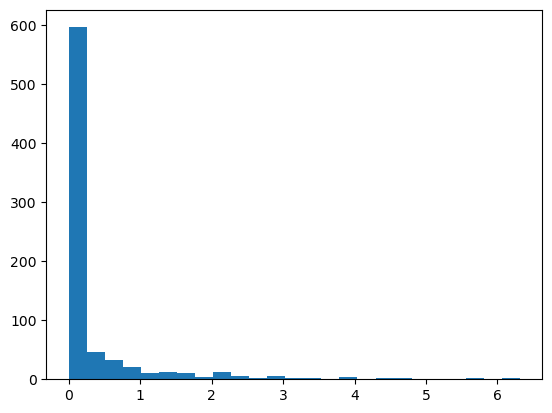

In [16]:
plt.hist(train_scaled_ts,bins=25)

In [17]:
train_ts_np, train_ys_np, train_xs_np = train_scaled_ts, train_scaled_ys, np.array(train_xs_df)
test_ts_np, test_ys_np, test_xs_np = np.array(test_ts_df), np.array(test_ys_df), np.array(test_xs_df)

In [18]:
train_ts_np.shape, train_ys_np.shape, train_xs_np.shape

((780,), (780, 2), (780,))

# Make Dataset

In [19]:
train_np = np.concatenate([train_ts_np.reshape(-1,1), train_ys_np, train_xs_np.reshape(-1,1)], axis = 1)
test_np = np.concatenate([test_ts_np.reshape(-1,1), test_ys_np, test_xs_np.reshape(-1,1)], axis = 1)

In [20]:
train_np.shape, test_np.shape

((780, 4), (260, 4))

In [21]:
from typing import Tuple

def make_sequence_data(data: np.ndarray, seq_size: int) -> Tuple[np.ndarray, np.ndarray]:
    
    """データをsequence_sizeに指定したサイズのシーケンスに分けてシーケンスとその答えをarrayで返す
    Args:
        data (np.ndarray): 入力データ
        seq_size (int): シーケンスサイズ
    Returns:
        seq_arr: seq_sizeに指定した数のシーケンスを格納するarray
        target_arr: シーケンスに対応する答えを格納するarray
    """

    num_data = len(data)
    seq_data = []
    target_data = []
    
    for i in range(num_data - seq_size):
        seq_data.append(data[i:i+seq_size])
        target_data.append(data[i+seq_size:i+seq_size+1])
        
    seq_arr = np.array(seq_data)
    target_arr = np.array(target_data)

    return seq_arr, target_arr

In [22]:
#何週前のデータから予測するか
seq_length = 4

train_Xs, train_ys = make_sequence_data(train_np, seq_length)

In [23]:
train_Xs.shape, train_ys.shape

((776, 4, 4), (776, 1, 4))

In [24]:
np.save(exp_dir + "train_X_" + str(seq_length) + "w.npy", train_Xs)
np.save(exp_dir + "train_y_" + str(seq_length) + "w.npy", train_ys)

In [25]:
np.save(exp_dir + "train_np.npy", train_np)
np.save(exp_dir + "test_np.npy", test_np)

# Dataset and DataLoader

In [26]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import torch
import torch.nn as nn
from torch.nn import Sequential, Linear, Tanh, Sigmoid, LeakyReLU, ReLU
import torch.nn.functional as F
import torch.optim as optim

import numpy as np #数値計算用ライブラリ
import matplotlib.pyplot as plt #描画用ライブラリ

In [27]:
root_dir = "datasets/infuluenza/"
data_path = root_dir + "Influenza.csv"
exp_dir = "datasets/infuluenza/vecLSTMx/"

In [28]:
train_Xs = np.load(exp_dir + "train_X_" + str(seq_length) + "w.npy")
train_ys = np.load(exp_dir + "train_y_" + str(seq_length) + "w.npy")

In [29]:
train_Xs.shape, train_ys.shape

((776, 4, 4), (776, 1, 4))

In [30]:
import joblib

# スケーラーの読み込み
std_scaler = joblib.load(exp_dir + 'std_scaler.joblib')

In [31]:
import pandas as pd

labels = train_ys[:,:,0]
print(labels[:,0].shape)
binned_labels = pd.qcut(labels[:,0], q=10, labels=False, duplicates='drop')

(776,)


In [32]:
import numpy as np
from sklearn.model_selection import train_test_split

train_Xs, val_Xs, train_ys, val_ys = train_test_split(
    train_Xs, train_ys, test_size=0.20, stratify=binned_labels, random_state=42
)

In [33]:
np.save(exp_dir + "train_Xs_" + str(seq_length) + "w.npy", train_Xs)
np.save(exp_dir + "train_ys_" + str(seq_length) + "w.npy", train_ys)
np.save(exp_dir + "val_Xs_" + str(seq_length) + "w.npy", val_Xs)
np.save(exp_dir + "val_ys_" + str(seq_length) + "w.npy", val_ys)

In [34]:
trn_xs_tensor = torch.Tensor(train_Xs)
trn_ys_tensor = torch.Tensor(train_ys)

val_xs_tensor = torch.Tensor(val_Xs)
val_ys_tensor = torch.Tensor(val_ys)

In [35]:
trn_xs_tensor.shape, trn_ys_tensor.shape, val_xs_tensor.shape, val_ys_tensor.shape

(torch.Size([620, 4, 4]),
 torch.Size([620, 1, 4]),
 torch.Size([156, 4, 4]),
 torch.Size([156, 1, 4]))

In [36]:
from torch.utils.data import TensorDataset, DataLoader

trn_dataset = TensorDataset(trn_xs_tensor, trn_ys_tensor)
trn_loader = DataLoader(dataset=trn_dataset,batch_size=50,shuffle=True)

val_dataset = TensorDataset(val_xs_tensor, val_ys_tensor)
val_loader = DataLoader(dataset=val_dataset,batch_size=50,shuffle=False)

In [37]:
for id, batch_data in enumerate(trn_loader):
    
    batch_x, batch_y = batch_data
    print(id, batch_x.shape, batch_y.shape)

0 torch.Size([50, 4, 4]) torch.Size([50, 1, 4])
1 torch.Size([50, 4, 4]) torch.Size([50, 1, 4])
2 torch.Size([50, 4, 4]) torch.Size([50, 1, 4])
3 torch.Size([50, 4, 4]) torch.Size([50, 1, 4])
4 torch.Size([50, 4, 4]) torch.Size([50, 1, 4])
5 torch.Size([50, 4, 4]) torch.Size([50, 1, 4])
6 torch.Size([50, 4, 4]) torch.Size([50, 1, 4])
7 torch.Size([50, 4, 4]) torch.Size([50, 1, 4])
8 torch.Size([50, 4, 4]) torch.Size([50, 1, 4])
9 torch.Size([50, 4, 4]) torch.Size([50, 1, 4])
10 torch.Size([50, 4, 4]) torch.Size([50, 1, 4])
11 torch.Size([50, 4, 4]) torch.Size([50, 1, 4])
12 torch.Size([20, 4, 4]) torch.Size([20, 1, 4])


In [38]:
for id, batch_data in enumerate(val_loader):
    
    batch_x, batch_y = batch_data
    print(id, batch_x.shape, batch_y.shape)

0 torch.Size([50, 4, 4]) torch.Size([50, 1, 4])
1 torch.Size([50, 4, 4]) torch.Size([50, 1, 4])
2 torch.Size([50, 4, 4]) torch.Size([50, 1, 4])
3 torch.Size([6, 4, 4]) torch.Size([6, 1, 4])


# LSTM model

In [39]:
class cLSTM(nn.Module):
    def __init__(self, input_size = 4, hidden_size=32, cond_size = 1, output_size=4, num_layers = 2):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.cond_size = cond_size
        self.n_layers = num_layers
        
        self.relu = ReLU()
        self.lrelu = LeakyReLU(negative_slope=0.01)
        
        # input_sizeは入力する次元数
        self.lstm = nn.LSTM(input_size=self.input_size, num_layers=self.n_layers, hidden_size=self.hidden_size, dropout=0.2)
        
        self.cfc1 = nn.Linear(self.cond_size, int(self.hidden_size / 2))
        self.cfc2 = nn.Linear(int(self.hidden_size / 2), int(self.hidden_size / 4))
        
        self.fc1 = nn.Linear(int(self.hidden_size / 4) + self.hidden_size, self.hidden_size * 4)
        self.fc2 = nn.Linear(self.hidden_size * 4, self.output_size)


    def forward(self, x, cin):
        last_outs, hidden = self.lstm(x) #(batch_size, seq_len, hidden)
        outs = last_outs[:, -1, :] #(batch_size, hidden)
        
        ch1 = self.relu(self.cfc1(cin))
        ch2 = self.cfc2(ch1)
        
        h_list = [outs, ch2]
        h1 = torch.cat(h_list, dim=1)
        h2 = self.relu(self.fc1(h1))
        h3 = self.fc2(h2)
        
        y_list = [self.relu(h3[:,0:1]), h3[:,1:3]]
        ys = torch.cat(y_list, dim=1)

        return ys

In [40]:
model = cLSTM(input_size = 4, hidden_size = 32, cond_size = 1, output_size = 3, num_layers = 1)

/home/is/daiki-ko/.local/lib/python3.9/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


## Prediction

In [41]:
batch_0x = list(trn_loader)[0][0]
batch_0c = list(trn_loader)[0][1]

In [42]:
batch_0x.shape, batch_0c.shape

(torch.Size([50, 4, 4]), torch.Size([50, 1, 4]))

In [43]:
batch_0c = torch.reshape(batch_0c[:,:,-1], (batch_0c.shape[0], 1))

In [44]:
batch_0c.shape

torch.Size([50, 1])

In [45]:
preds = model(batch_0x, batch_0c)

In [46]:
preds.shape

torch.Size([50, 3])

## Train

In [47]:
model.cuda()

cLSTM(
  (relu): ReLU()
  (lrelu): LeakyReLU(negative_slope=0.01)
  (lstm): LSTM(4, 32, dropout=0.2)
  (cfc1): Linear(in_features=1, out_features=16, bias=True)
  (cfc2): Linear(in_features=16, out_features=8, bias=True)
  (fc1): Linear(in_features=40, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
)

In [48]:
criterion = nn.MSELoss(reduction='none').cuda()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [49]:
def val_model(epoch):
    
    model.eval()
    
    sum_errors = 0
    
    for batch_data in val_loader:
       
        with torch.no_grad():
            
            if torch.cuda.is_available():
                inputs, trues = batch_data
                inputs, trues = inputs.cuda(), trues.cuda()
                input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))

            preds = model(inputs, input_c)
            true_ys = torch.reshape(trues[:,:,0:3], (trues.shape[0], 3))
            loss = criterion(preds, true_ys).mean(dim=0).mean()
            
            sum_errors = sum_errors + loss.data.item()

            del loss
            torch.cuda.empty_cache()
            
    return sum_errors / len(val_loader)

In [50]:
train_loss_hist = []
val_loss_hist = []
best_loss = 1e10
n_epochs = 500

for epoch in range(n_epochs):
    
    model.train()
    train_loss = 0
    
    for batch_data in trn_loader:
        
        inputs, trues = batch_data
        inputs, trues = inputs.cuda(), trues.cuda()
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        optimizer.zero_grad()
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:3], (trues.shape[0], 3))
        loss = criterion(preds, true_ys).mean(dim=0).mean()
        
        loss.backward() #偏微分を計算
        
        train_loss += loss.item()

        #パラメータを更新する
        optimizer.step()
    
    val_loss = val_model(epoch)
    train_loss_hist.append(train_loss / len(trn_loader))
    val_loss_hist.append(val_loss)
    
    print("epoch: ", epoch, "Train loss: ", train_loss / len(trn_loader), "Val loss: ", val_loss)
    
    if val_loss < best_loss:
        save_model_path = exp_dir + "best_model_" + str(seq_length) + "w.pt"
        torch.save(model, save_model_path)
        best_loss = val_loss

epoch:  0 Train loss:  0.9541467198958764 Val loss:  0.813056468963623
epoch:  1 Train loss:  0.8986267034824078 Val loss:  0.7208335548639297
epoch:  2 Train loss:  0.7727075998599713 Val loss:  0.5583324432373047
epoch:  3 Train loss:  0.5480731943478951 Val loss:  0.3663192316889763
epoch:  4 Train loss:  0.3996158895584253 Val loss:  0.31546131521463394
epoch:  5 Train loss:  0.3542833225085185 Val loss:  0.30561573430895805
epoch:  6 Train loss:  0.34175139436355007 Val loss:  0.2939937338232994
epoch:  7 Train loss:  0.28973816679074216 Val loss:  0.28139248490333557
epoch:  8 Train loss:  0.2598743369946113 Val loss:  0.2723816931247711
epoch:  9 Train loss:  0.24312217648212725 Val loss:  0.26075853779911995
epoch:  10 Train loss:  0.22750779527884263 Val loss:  0.2501872107386589
epoch:  11 Train loss:  0.20321298791812017 Val loss:  0.24684061855077744
epoch:  12 Train loss:  0.1978741345497278 Val loss:  0.23926131054759026
epoch:  13 Train loss:  0.20433020477111524 Val los

epoch:  111 Train loss:  0.17246121626633865 Val loss:  0.21351207792758942
epoch:  112 Train loss:  0.16710478239334547 Val loss:  0.21689609438180923
epoch:  113 Train loss:  0.1690477694456394 Val loss:  0.21772412210702896
epoch:  114 Train loss:  0.16853752273779649 Val loss:  0.2185654193162918
epoch:  115 Train loss:  0.1662998073376142 Val loss:  0.2141674943268299
epoch:  116 Train loss:  0.16721865420158094 Val loss:  0.21654928848147392
epoch:  117 Train loss:  0.16734933394652146 Val loss:  0.21352725848555565
epoch:  118 Train loss:  0.164488367163218 Val loss:  0.2107703909277916
epoch:  119 Train loss:  0.16465630668860215 Val loss:  0.2155255302786827
epoch:  120 Train loss:  0.16661853572497 Val loss:  0.21762220934033394
epoch:  121 Train loss:  0.16657180396410134 Val loss:  0.21348726376891136
epoch:  122 Train loss:  0.16561460380370802 Val loss:  0.21560564264655113
epoch:  123 Train loss:  0.16364736969654375 Val loss:  0.21519041061401367
epoch:  124 Train loss:

epoch:  220 Train loss:  0.1611074426999459 Val loss:  0.2162727676331997
epoch:  221 Train loss:  0.1593763897052178 Val loss:  0.21374402567744255
epoch:  222 Train loss:  0.15446244466763276 Val loss:  0.2152583710849285
epoch:  223 Train loss:  0.15613621473312378 Val loss:  0.21897493302822113
epoch:  224 Train loss:  0.16117748618125916 Val loss:  0.21006014570593834
epoch:  225 Train loss:  0.1625900795826545 Val loss:  0.21648986265063286
epoch:  226 Train loss:  0.16161392056024992 Val loss:  0.21714629977941513
epoch:  227 Train loss:  0.16473144063582787 Val loss:  0.21682801842689514
epoch:  228 Train loss:  0.16164918817006624 Val loss:  0.21443749964237213
epoch:  229 Train loss:  0.15875979111744806 Val loss:  0.21199683845043182
epoch:  230 Train loss:  0.15869056376127097 Val loss:  0.2183418646454811
epoch:  231 Train loss:  0.1606070170035729 Val loss:  0.21616824716329575
epoch:  232 Train loss:  0.16051009469307387 Val loss:  0.21623661741614342
epoch:  233 Train l

epoch:  332 Train loss:  0.1590359337054766 Val loss:  0.2182605005800724
epoch:  333 Train loss:  0.15936098305078653 Val loss:  0.22019929811358452
epoch:  334 Train loss:  0.15948909521102905 Val loss:  0.22378046810626984
epoch:  335 Train loss:  0.1549938710836264 Val loss:  0.2154190056025982
epoch:  336 Train loss:  0.1562489540531085 Val loss:  0.220068521797657
epoch:  337 Train loss:  0.15592238650872156 Val loss:  0.21538273245096207
epoch:  338 Train loss:  0.15536154061555862 Val loss:  0.21732871606945992
epoch:  339 Train loss:  0.15166588929983285 Val loss:  0.21337398141622543
epoch:  340 Train loss:  0.15125340051375902 Val loss:  0.21659743040800095
epoch:  341 Train loss:  0.1505008448774998 Val loss:  0.21954942122101784
epoch:  342 Train loss:  0.15275025654297608 Val loss:  0.21753641217947006
epoch:  343 Train loss:  0.15250037209345743 Val loss:  0.21829234063625336
epoch:  344 Train loss:  0.14983990043401718 Val loss:  0.21760977059602737
epoch:  345 Train lo

epoch:  444 Train loss:  0.150920709165243 Val loss:  0.22318188473582268
epoch:  445 Train loss:  0.14916436202250993 Val loss:  0.21983333677053452
epoch:  446 Train loss:  0.14944283320353582 Val loss:  0.22637328878045082
epoch:  447 Train loss:  0.14690389541479257 Val loss:  0.2245187647640705
epoch:  448 Train loss:  0.15339642419264868 Val loss:  0.22175569087266922
epoch:  449 Train loss:  0.15149143166266954 Val loss:  0.22964109852910042
epoch:  450 Train loss:  0.14493553798932296 Val loss:  0.2265876904129982
epoch:  451 Train loss:  0.1473443158544027 Val loss:  0.2202325575053692
epoch:  452 Train loss:  0.15160550807531065 Val loss:  0.22509488835930824
epoch:  453 Train loss:  0.14854779151769784 Val loss:  0.23031629249453545
epoch:  454 Train loss:  0.148878952058462 Val loss:  0.22250733897089958
epoch:  455 Train loss:  0.1470015667952024 Val loss:  0.22187190130352974
epoch:  456 Train loss:  0.14924822747707367 Val loss:  0.22493281215429306
epoch:  457 Train los

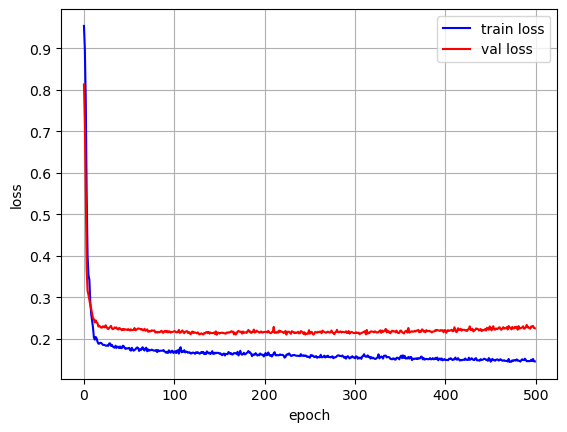

In [51]:
import matplotlib.pyplot as plt

plt.plot(range(len(train_loss_hist)), train_loss_hist, c='b', label='train loss')
plt.plot(range(len(val_loss_hist)), val_loss_hist, c='r', label='val loss')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()

In [52]:
np.argmin(val_loss_hist), np.min(val_loss_hist)

(147, 0.20964635908603668)

In [53]:
save_model_path = exp_dir + "best_model_" + str(seq_length) + "w.pt"

model = torch.load(save_model_path)

### Scatter plot

In [54]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(trn_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        trues = torch.reshape(trues, (1, 1, trues.shape[-1]))
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:3], (trues.shape[0], 3))
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_ys.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [55]:
np.array(trues_list).shape, np.array(preds_list).shape

((620, 1, 3), (620, 1, 3))

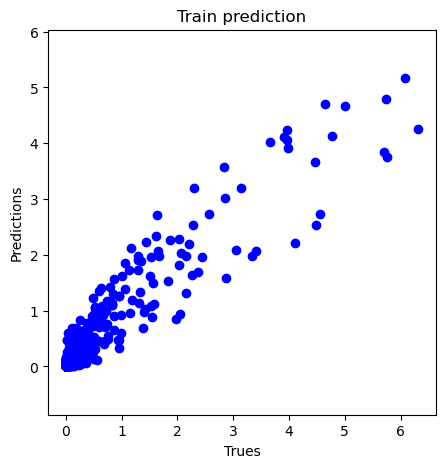

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Train prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.axis("equal")  # X軸とY軸を同じスケールにする
plt.show()

In [57]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(val_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        trues = torch.reshape(trues, (1, 1, trues.shape[-1]))
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:3], (trues.shape[0], 3))
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_ys.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155


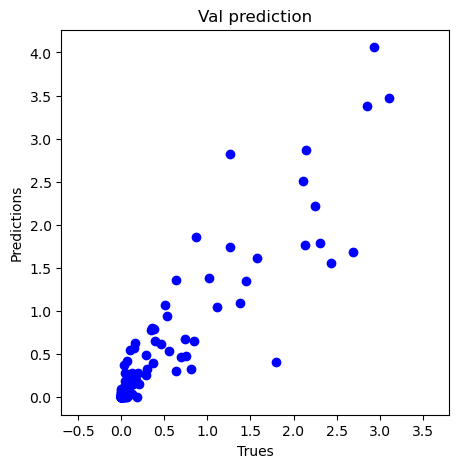

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Val prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.axis("equal")  # X軸とY軸を同じスケールにする

plt.show()

## Test prediction

In [59]:
#test_np = np.concatenate([test_ts_np.reshape(-1,1), test_ys_np, test_xs_np.reshape(-1,1)], axis = 1)

train_np = np.load(exp_dir + "train_np.npy")
test_np = np.load(exp_dir + "test_np.npy")

In [60]:
train_np.shape, test_np.shape

((780, 4), (260, 4))

In [61]:
#元のデータの最大値と最小値を指定
dat_min = 0
dat_max = 3e5

#スケール後の最大値と最小値を指定
custom_min = 0
custom_max = 100

In [62]:
test_scaled_ts = (np.array(test_np[:,0]) - dat_min) / (dat_max - dat_min) * (custom_max - custom_min) + custom_min

In [63]:
test_scaled_ys = std_scaler.transform(test_np[:,1:3])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [64]:
test_scaled_ys.shape, test_scaled_ts.reshape(-1,1).shape, test_np[:,-1].shape

((260, 2), (260, 1), (260,))

In [65]:
test_all_np = np.concatenate([test_scaled_ts.reshape(-1,1), test_scaled_ys, test_np[:,-1].reshape(-1,1)], axis = 1)

In [66]:
test_all_np.shape

(260, 4)

In [67]:
test_np[:,-1].shape, test_scaled_ts.shape, test_scaled_ys.shape, test_np.shape

((260,), (260,), (260, 2), (260, 4))

### 1. Prediction based on results from 40 days ago

In [68]:
from typing import Tuple

def make_sequence_data(data: np.ndarray, seq_size: int) -> Tuple[np.ndarray, np.ndarray]:
    
    """データをsequence_sizeに指定したサイズのシーケンスに分けてシーケンスとその答えをarrayで返す
    Args:
        data (np.ndarray): 入力データ
        seq_size (int): シーケンスサイズ
    Returns:
        seq_arr: seq_sizeに指定した数のシーケンスを格納するarray
        target_arr: シーケンスに対応する答えを格納するarray
    """

    num_data = len(data)
    seq_data = []
    target_data = []
    
    for i in range(num_data - seq_size):
        seq_data.append(data[i:i+seq_size])
        target_data.append(data[i+seq_size:i+seq_size+1])
        
    seq_arr = np.array(seq_data)
    target_arr = np.array(target_data)

    return seq_arr, target_arr

In [69]:
test_Xs, test_ys = make_sequence_data(test_all_np, seq_length)

In [70]:
tst_xs_tensor = torch.Tensor(test_Xs)
tst_ys_tensor = torch.Tensor(test_ys)

In [71]:
from torch.utils.data import TensorDataset, DataLoader

tst_dataset = TensorDataset(tst_xs_tensor, tst_ys_tensor)

In [72]:
preds_list = []
trues_list = []

model.eval()
with torch.no_grad(): # 勾配計算の無効化
    for id, data in enumerate(tst_dataset):
        inputs, trues = data
        inputs, trues = inputs.cuda(), trues.cuda()
        
        inputs = torch.reshape(inputs, (1, seq_length, inputs.shape[-1]))
        trues = torch.reshape(trues, (1, 1, trues.shape[-1]))
        input_c = torch.reshape(trues[:,:,-1], (trues.shape[0], 1))
        
        preds = model(inputs, input_c)
        true_ys = torch.reshape(trues[:,:,0:3], (trues.shape[0], 3))
        
        print(id)
        preds_list.append(preds.to('cpu').detach().numpy().copy())
        trues_list.append(true_ys.to('cpu').detach().numpy().copy())

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255


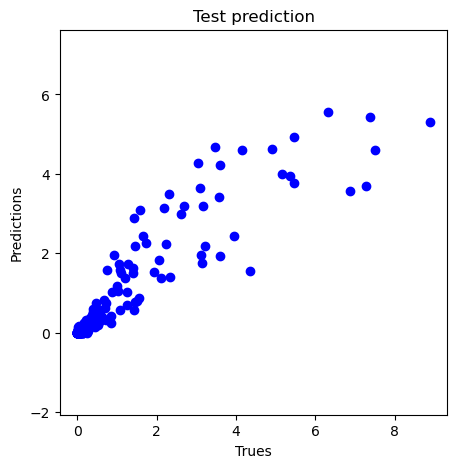

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0], c = "b") # 散布図を描画
plt.title("Test prediction")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画
plt.gca().set_aspect('equal', adjustable='datalim')

plt.show()

In [74]:
tst_trues, tst_preds = np.array(trues_list)[:,:,0], np.array(preds_list)[:,:,0]

In [75]:
tst_preds = (np.array(preds_list)[:,:,0] - custom_min) / (custom_max - custom_min) * (dat_max - dat_min) + dat_min

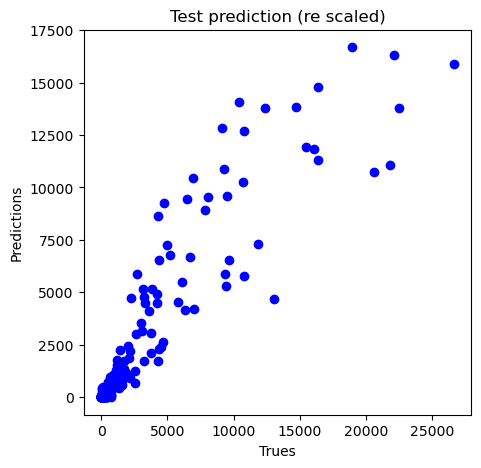

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(test_np[seq_length:,0], tst_preds, c = "b") # 散布図を描画
plt.title("Test prediction (re scaled)")
plt.xlabel("Trues")
plt.ylabel("Predictions")
# y=x の対角線を追加
#plt.plot([-2.0, 3.5], [-2.0, 3.5], 'r--')  # 赤の破線で対角線を描画

plt.show()

In [77]:
tst_preds.shape

(256, 1)

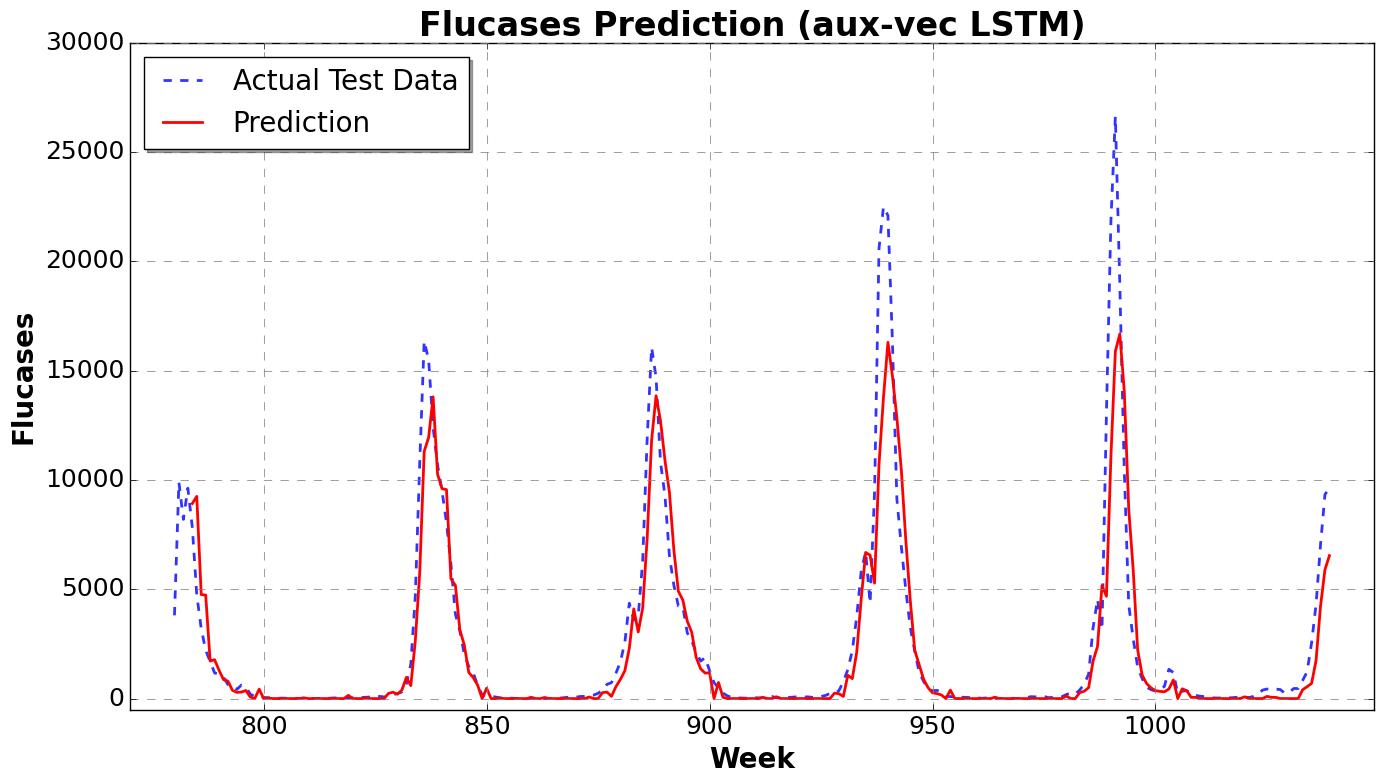

In [78]:
plt.figure(figsize=(14, 8))
plt.style.use('classic')  # スタイリッシュな背景に変更

# 実際のデータと予測データをプロット
plt.plot(test_steps, df_tokyo["Flucases"][train_n:train_n+test_n], label="Actual Test Data", linestyle='--', linewidth=2, color='blue', alpha=0.8)
plt.plot(test_steps[seq_length:], tst_preds, label="Prediction", linestyle='-', linewidth=2, color='red', alpha=1.0)

# 軸ラベルとタイトルを追加
plt.xlabel("Week", fontsize=20, fontweight='bold')
plt.ylabel("Flucases", fontsize=20, fontweight='bold')
plt.title("Flucases Prediction (aux-vec LSTM)", fontsize=24, fontweight='bold')

# グリッドの調整
plt.grid(color='gray', linestyle='--', linewidth=0.75, alpha=0.75)

# 目盛りのフォントサイズを変更
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# 凡例の調整
plt.legend(fontsize=20, loc='upper left', frameon=True, shadow=True)
plt.ylim(bottom=-500)
plt.xlim(left=min(test_steps) - 10, right = max(test_steps) + 10)

# 仕上げ
plt.tight_layout()
#plt.savefig("Flucases Prediction (aux-vec LSTM).jpg", dpi=200, bbox_inches='tight', format='jpg')
plt.show()

In [79]:
from sklearn.metrics import (
    mean_squared_error,  # MSE
    mean_absolute_error,  # MAE
    r2_score, # R2
)

from scipy.stats import pearsonr

def reg_metric(trues, preds, name):
    mse = mean_squared_error(trues, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(trues, preds)
    r2 = r2_score(trues, preds)
    r, p = pearsonr(trues, preds)
    
    print(name)
    print(f'MSE : {mse}.')
    print(f'RMSE : {rmse}.')
    print(f'MAE : {mae}.')
    print(f'R2 : {r2}.')
    print("pearson :", r, p)

In [80]:
reg_metric(test_np[seq_length:,0], tst_preds[:,0], "Flucases")

Flucases
MSE : 3340685.4933220027.
RMSE : 1827.7542212567866.
MAE : 763.5437122881413.
R2 : 0.8376197377640653.
pearson : 0.9243798932542483 2.659653684432009e-108


In [81]:
reg_metric(test_np[seq_length*13:,0], tst_preds[seq_length*12:,0], "Flucases")

Flucases
MSE : 3961797.919578284.
RMSE : 1990.4265672408726.
MAE : 875.1817997602316.
R2 : 0.835700614846515.
pearson : 0.9268429788117452 1.3635533358130103e-89


In [82]:
len(test_np[seq_length*13:,0]), len(tst_preds[seq_length*12:,0])

(208, 208)